### Introduction

The logistic regression classifier is a discriminative model for binary classification. Before the advent of deep learning and its easy-to-use libraries, the logistic regression classifier was one of the widely deployed classifiers for machine learning applications. It is still widely used for linear classification, especially in the medical domain.

Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set. Logistic regression has become an important tool in the discipline of machine learning. The approach allows an algorithm being used in a machine learning application to classify incoming data based on historical data.
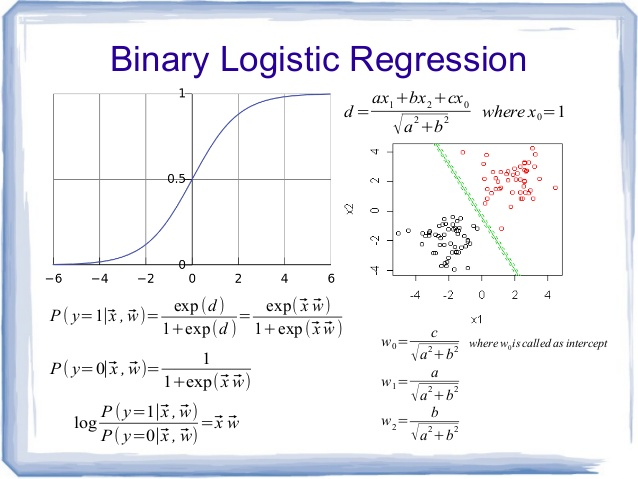

### The Logistic Curve

The logistic curve relates the independent variable, X, to the rolling mean of the DV, P (). The formula to do so may be written either

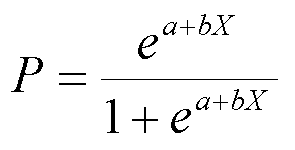

or 

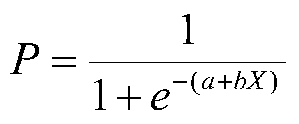

where P is the probability of a 1 (the proportion of 1s, the mean of Y), e is the base of the natural logarithm (about 2.718) and a and b are the parameters of the model. The value of a yields P when X is zero, and b adjusts how quickly the probability changes with changing X a single unit (we can have standardized and unstandardized b weights in logistic regression, just as in ordinary linear regression). Because the relation between X and P is nonlinear, b does not have a straightforward interpretation in this model as it does in ordinary linear regression.

Loss Function

A loss function is a measure of fit between a mathematical model of data and the actual data. We choose the parameters of our model to minimize the badness-of-fit or to maximize the goodness-of-fit of the model to the data. With least squares (the only loss function we have used thus far), we minimize SSres, the sum of squares residual. This also happens to maximize SSreg, the sum of squares due to regression. With linear or curvilinear models, there is a mathematical solution to the problem that will minimize the sum of squares, that is,

b = (X'X)-1X'y

Or

b = R-1r




In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
new = pd.read_csv('breast_cancer_data.csv')

In [4]:
new.head()

,clumpThickness,CellSize,CellShape,Adhesion,Epithelial,BareNucleic,Chromatin,Nucleoli,Mitoses,class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign


In [5]:
new.tail()

,clumpThickness,CellSize,CellShape,Adhesion,Epithelial,BareNucleic,Chromatin,Nucleoli,Mitoses,class
678,3,1,1,1,3,2,1,1,1,benign
679,2,1,1,1,2,1,1,1,1,benign
680,5,10,10,3,7,3,8,10,2,malignant
681,4,8,6,4,3,4,10,6,1,malignant
682,4,8,8,5,4,5,10,4,1,malignant


In [6]:
### logistical with with response that is not numeric


In [7]:
##identify of categorial does new set of date below to## binary classficiation..

In [8]:
### for logistic, we will be using cofuaionmatrix to see the predictive class and see the miss classification

In [9]:
##we have tp, tn, fp(type 1: we predicted yes but truly didnt not), np (type 11:: have the disease but we predicted no):: accurracy is how often that it is correct: tp +tn
##### misclassification rate: overall how wrong we were: fn +fp/ total cases::

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

In [12]:
## changing class to 0 or 1

In [13]:
new['class'] = (new ['class'] == 'benign').astype(int)

In [14]:
new.head()

,clumpThickness,CellSize,CellShape,Adhesion,Epithelial,BareNucleic,Chromatin,Nucleoli,Mitoses,class
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1


In [15]:
new.tail()

,clumpThickness,CellSize,CellShape,Adhesion,Epithelial,BareNucleic,Chromatin,Nucleoli,Mitoses,class
678,3,1,1,1,3,2,1,1,1,1
679,2,1,1,1,2,1,1,1,1,1
680,5,10,10,3,7,3,8,10,2,0
681,4,8,6,4,3,4,10,6,1,0
682,4,8,8,5,4,5,10,4,1,0


In [16]:
### now that data have been changed, it is time to work on the logistic model

In [17]:
new.isnull()

,clumpThickness,CellSize,CellShape,Adhesion,Epithelial,BareNucleic,Chromatin,Nucleoli,Mitoses,class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
678,False,False,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False
681,False,False,False,False,False,False,False,False,False,False


In [18]:
### we have all data in the our data set

In [19]:
###sns  is used for heat map

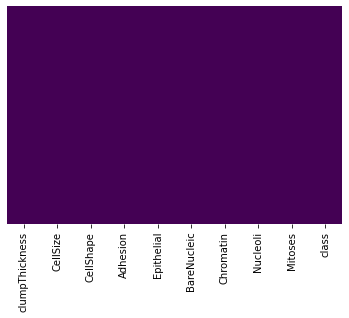

In [20]:
sns.heatmap(new.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [26]:
#### sns shows also  if you have any null in your data.. So in this case we do not


In [27]:
new.head()

,clumpThickness,CellSize,CellShape,Adhesion,Epithelial,BareNucleic,Chromatin,Nucleoli,Mitoses,class
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1


In [28]:
###let continue to plot with sns

In [29]:
sns.set_style('whitegrid')

In [30]:
### lets see ration of the clas

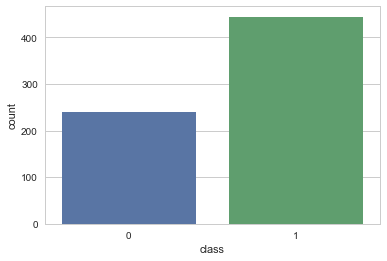

In [31]:
sns.countplot(x = 'class', data = new)

In [32]:
## more people with begnin tumor than malignant 

In [33]:
### to compare to with variable

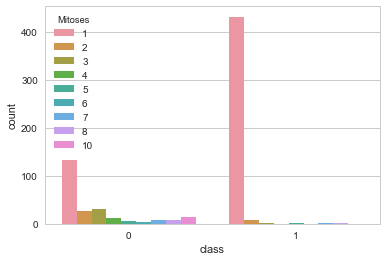

In [37]:
sns.countplot(x = 'class', hue = 'Mitoses', data = new)

In [38]:
print(new.describe())

       clumpThickness    CellSize   CellShape    Adhesion  Epithelial  \
count      683.000000  683.000000  683.000000  683.000000  683.000000   
mean         4.442167    3.150805    3.215227    2.830161    3.234261   
std          2.820761    3.065145    2.988581    2.864562    2.223085   
min          1.000000    1.000000    1.000000    1.000000    1.000000   
25%          2.000000    1.000000    1.000000    1.000000    2.000000   
50%          4.000000    1.000000    1.000000    1.000000    2.000000   
75%          6.000000    5.000000    5.000000    4.000000    4.000000   
max         10.000000   10.000000   10.000000   10.000000   10.000000   

       BareNucleic   Chromatin    Nucleoli     Mitoses       class  
count   683.000000  683.000000  683.000000  683.000000  683.000000  
mean      3.544656    3.445095    2.869693    1.603221    0.650073  
std       3.643857    2.449697    3.052666    1.732674    0.477296  
min       1.000000    1.000000    1.000000    1.000000    0.000000

In [43]:
type(new)

pandas.core.frame.DataFrame

In [46]:
### need to find out how to determine who data for python

In [51]:
new.columns

Index(['clumpThickness', 'CellSize', 'CellShape', 'Adhesion', 'Epithelial',
       'BareNucleic', 'Chromatin', 'Nucleoli', 'Mitoses', 'class'],
      dtype='object')

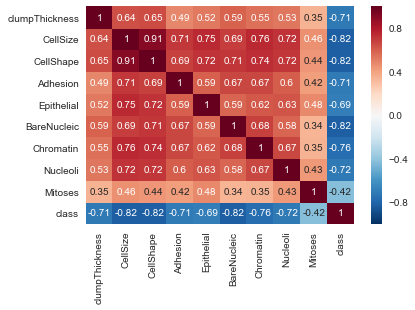

In [53]:
sns.heatmap(new.corr(), annot = True)

In [55]:
### how to see the structure
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
clumpThickness    683 non-null int64
CellSize          683 non-null int64
CellShape         683 non-null int64
Adhesion          683 non-null int64
Epithelial        683 non-null int64
BareNucleic       683 non-null int64
Chromatin         683 non-null int64
Nucleoli          683 non-null int64
Mitoses           683 non-null int64
class             683 non-null int64
dtypes: int64(10)
memory usage: 53.4 KB


In [58]:
## looking at each class col to see what we have
new['class']


0      1
1      1
2      1
3      1
4      1
5      0
6      1
7      1
8      1
9      1
10     1
11     1
12     0
13     1
14     0
15     0
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
653    0
654    0
655    1
656    1
657    1
658    1
659    1
660    1
661    1
662    1
663    1
664    0
665    0
666    1
667    1
668    1
669    1
670    1
671    1
672    1
673    1
674    1
675    0
676    1
677    1
678    1
679    1
680    0
681    0
682    0
Name: class, Length: 683, dtype: int64

0       1
1       4
2       1
3       8
4       1
5      10
6       1
7       2
8       1
9       1
10      1
11      1
12      3
13      1
14      5
15      6
16      1
17      1
18      7
19      1
20      2
21      5
22      1
23      1
24      3
25      1
26      1
27      1
28      3
29      1
       ..
653    10
654     7
655     1
656     1
657     2
658     1
659     4
660     2
661     1
662     1
663     1
664    10
665    10
666     1
667     1
668     1
669     1
670     1
671     1
672     1
673     1
674     1
675    10
676     1
677     1
678     1
679     1
680    10
681     6
682     8
Name: CellShape, Length: 683, dtype: int64

In [61]:
###cleaning data

In [64]:
import pandas as pd

In [66]:
new.columns

Index(['clumpThickness', 'CellSize', 'CellShape', 'Adhesion', 'Epithelial',
       'BareNucleic', 'Chromatin', 'Nucleoli', 'Mitoses', 'class'],
      dtype='object')

In [67]:
### X = indep, y = predictor
X = new.drop('class', axis = 1)
Y = new['class']

In [68]:
from sklearn.cross_validation import train_test_split

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [71]:
## now let train and med

In [72]:
from sklearn.linear_model import LogisticRegression

In [74]:
logmodel = LogisticRegression()

In [76]:
logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
prediction = logmodel.predict(X_test)

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96        68
          1       0.96      1.00      0.98       137

avg / total       0.98      0.98      0.98       205



In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(Y_test,prediction)

array([[ 63,   5],
       [  0, 137]])